# Nama Kelompok:
##### 1. Aghna Shava Akyela Wahjudi (103102400028)
##### 2. Muhammad Alfayyadh Nezzati Qosim (103102400029)
##### 3. Talitha Shafa Azzahra (103102400079)
##### 4. Widya Situmorang (103102400081)


### 1. Mengenali karakteristik data

Mengenali karakteristik data berarti memahami sifat-sifat dasar dari data ketika direpresentasikan sebagai array multidimensi dengan NumPy — misalnya bentuk (shape), jumlah elemen, tipe data tiap elemen, bagaimana data disimpan di memori, dan bagaimana subset data dipilih atau dimodifikasi. Pemahaman ini penting karena memengaruhi cara kita menulis operasi ter-vektorisasi yang efisien, menghindari bug (mis. akibat tipe yang salah atau view vs copy), dan memilih representasi yang tepat untuk kebutuhan numerik atau interfacing dengan kode eksternal.


1.1. Struktur & atribut dasar ndarray

Setiap objek ndarray menyimpan metadata penting:
- shape → tuple dimensi,
- ndim → jumlah sumbu,
- size → total elemen,
- dtype → tipe data elemen,
- nbytes → jumlah byte memori yang dipakai.

Menampilkan atribut-atribut ini adalah langkah pertama saat “mengenali” data.

In [1]:
import numpy as np

data = np.array([[1,2],[3,4],[5,6]])
print(data.shape, data.ndim, data.size, data.dtype, data.nbytes)

(3, 2) 2 6 int64 48


1.2. Tipe data (dtype) dan perilaku promosi tipe

NumPy memakai array homogen, artinya semua elemen memiliki dtype yang sama (mis. int32, float64, complex128). Pemilihan dtype sangat penting karena:
- Menentukan presisi perhitungan,
- Memengaruhi kecepatan operasi,
- Dapat memicu perilaku berbeda (contoh: akar kuadrat dari bilangan negatif).

Contoh:

In [2]:
# array float
a = np.array([1, 2, 3], dtype=float)     
# array complex
b = np.array([1, 2, 3], dtype=complex) 
# eksplisit dengan NumPy scalar types
a64 = np.array([1, 2, 3], dtype=np.float64)
c128 = np.array([1, 2, 3], dtype=np.complex128)

In [3]:
# Perbedaan efek pada operasi:
a = np.array([-1, 0, 1])

print(np.sqrt(a))                    
print(np.sqrt(a.astype(np.complex128))) 

[nan  0.  1.]
[0.+1.j 0.+0.j 1.+0.j]


C:\Users\fayadh\AppData\Local\Temp\ipykernel_13860\2605134126.py:4: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(a))


1.3. Urutan penyimpanan di memori & strides

Array multidim disimpan linear di memori dengan dua konvensi:
- order='C' (row-major, gaya C/Python),
- order='F' (column-major, gaya Fortran/Matlab).

Atribut strides menjelaskan bagaimana indeks → offset byte. Hal ini memengaruhi apakah operasi seperti transpose menghasilkan view atau memerlukan copy, juga berpengaruh pada performa.
Contoh singkat:

In [4]:
x = np.array([[1,2,3],[4,5,6]], dtype=np.int32, order='C')
print(x.strides)   # (12, 4) → lompat 12 byte per baris, 4 byte per kolom


(12, 4)


1.4. Indexing, slicing, views vs copies
- Indexing integer / slice: cara standar (a[1:4], A[:,1], dsb.).
- Slicing biasanya menghasilkan view (perubahan di slice mengubah array asli). Gunakan .copy() bila butuh salinan independen.
- Fancy indexing (pakai list/array integer) & Boolean indexing (pakai kondisi) menghasilkan copy.

Contoh:

In [5]:
a = np.arange(10)
print(a[1:-1:2])   # slicing biasa

A = np.arange(16).reshape(4,4)
sub = A[1:3, 1:3]  # view
sub[:, :] = -1     # A ikut berubah

C = sub.copy()     # copy
C[:, :] = 99       # A tidak terpengaruh


[1 3 5 7]


1.5. Membuat & menginisialisasi array

Untuk eksplorasi karakteristik data, penting juga tahu cara membuat array: np.array(...), np.zeros(...), np.ones(...), np.full(...), np.arange(...), np.linspace(...), np.logspace(...), np.empty(...), serta fungsi untuk membuat arrays berdasarkan fungsi (np.fromfunction) atau membaca dari file (np.genfromtxt, np.loadtxt). Mengetahui fungsi-fungsi ini membantu menyiapkan contoh data dan eksperimen saat mengenali sifat data.

Contoh:

In [6]:
np.zeros((2,3))            # array 2x3 berisi nol
np.linspace(0, 1, 5)       # [0. , 0.25, 0.5 , 0.75, 1. ]
np.fromfunction(lambda i,j: i+j, (3,3), dtype=int)


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Jadi, mengenali karakteristik data dengan NumPy mencakup:
- Mengetahui atribut array,
- Memahami tipe data & promosi tipe,
- Mengerti cara data disimpan di memori,
- Menyadari perbedaan antara view dan copy,
- Menguasai cara membuat array untuk keperluan eksplorasi.

Semua hal ini akan membuat manipulasi data multidimensi lebih aman, efisien, dan fleksibel.

### 2. Tipe data

Tipe Data pada NumPy (dtype) menentukan sifat numerik setiap elemen dalam sebuah ndarray — apakah elemen itu bilangan bulat, bilangan pecahan (float), bilangan kompleks, boolean, atau tipe khusus lain. Karena NumPy menggunakan homogeneous arrays (semua elemen satu tipe), pemilihan dtype memengaruhi presisi perhitungan, ukuran memori, perilaku fungsi matematika (contoh: akar kuadrat dari −1), serta perilaku promosi tipe saat operasi antara array berbeda tipe dilakukan. Pemahaman tentang tipe-tipe data ini (dan cara membuat/merubahnya) adalah kunci agar analisis numerik berjalan benar dan efisien. 

2.1. Gambaran singkat dtype

- Atribut dtype pada setiap ndarray memberi tahu tipe elemen (contoh: int32, float64, complex128, dll.).
- Default NumPy untuk bilangan real biasanya adalah float64. Pilihan bit-size memberikan kontrol presisi dan ukuran memori. 

2.2. Kategori tipe numerik (ringkasan)

- int (int8, int16, int32, int64) — bilangan bulat.
- uint (uint8, …) — bilangan bulat tanpa tanda.
- bool — True/False.
- float (float16, float32, float64, …) — floating-point.
- complex (complex64, complex128, …) — bilangan kompleks.

2.3. Membuat array dengan dtype tertentu (contoh)

Gunakan keyword dtype= saat membuat array atau konversi dengan .astype(...). Contoh (sudah disesuaikan agar kompatibel dengan versi NumPy modern — jangan menggunakan alias terdepresiasi seperti np.float):

In [8]:
import numpy as np

a = np.array([1, 2, 3], dtype=int)          # integer (biasanya int64)
b = np.array([1, 2, 3], dtype=float)        # float (biasanya float64)
c = np.array([1, 2, 3], dtype=complex)      # complex (complex128)


In [10]:
'''
Jika ingin mengubah tipe array yang sudah ada, 
gunakan .astype(...) (membuat salinan bertipe baru):
'''
f = b.astype(int)   # salinan b dalam tipe integer

2.4. Promosi tipe (type promotion) — apa yang terjadi saat operasi antar-tipe

Jika operasi melibatkan array dengan tipe berbeda, NumPy mempromosikan ke tipe yang dapat menampung hasilnya. Contoh umum: float + complex → complex. Ini penting untuk diperhatikan karena hasil operasi mungkin berubah dtypenya:

In [11]:
d1 = np.array([1,2,3], dtype=float)
d2 = np.array([1,2,3], dtype=complex)
r = d1 + d2
print(r.dtype)   # -> complex128


complex128


### 3. Membuat array dengan berbagai teknik

NumPy menyediakan berbagai teknik untuk membuat array sesuai kebutuhan. Cara paling sederhana adalah membuat array dari list Python menggunakan np.array([1, 2, 3]), yang langsung mengubah list menjadi array NumPy. Selain itu, NumPy juga menyediakan fungsi untuk membuat array dengan isi tertentu. Misalnya, np.zeros(n) menghasilkan array dengan elemen nol, np.ones(n) menghasilkan array berisi angka satu, dan np.full(n, nilai) menghasilkan array dengan nilai konstan tertentu.

Untuk membuat array dengan urutan bilangan, tersedia np.arange(start, stop, step) yang mirip dengan fungsi range pada Python tetapi menghasilkan array NumPy. Jika diperlukan array dengan jumlah elemen tertentu yang terdistribusi merata, digunakan np.linspace(start, stop, num), sedangkan untuk distribusi logaritmik dapat digunakan np.logspace(start, stop, num). Ada juga fungsi np.eye(n) untuk membuat matriks identitas, serta np.random yang bisa menghasilkan array dengan nilai acak sesuai distribusi tertentu (misalnya np.random.rand, np.random.randint). Dengan berbagai teknik ini, pengguna bisa membuat array sesuai konteks perhitungan: apakah untuk inisialisasi, simulasi data, atau keperluan matematis lainnya.
Contoh Kode : 


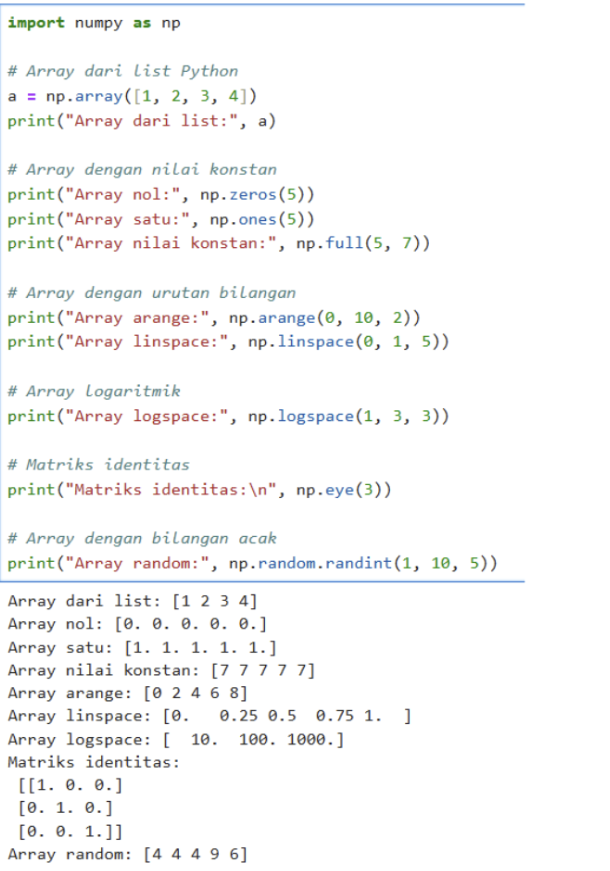

### 4. Membuat matriks

Membuat matriks berarti menghasilkan array dua dimensi (ndarray dengan ndim==2) yang akan dipakai sebagai struktur data utama untuk perhitungan linier dan numerik (mis. operasi aljabar linear, transformasi, produk skalar/luar, dll.). Di NumPy ada banyak cara membuat matriks — dari nested list sederhana, dari deret angka yang di-reshape, dari fungsi yang mendefinisikan setiap elemen, atau lewat pembuat khusus seperti zeros, eye, identity, diag — dan setiap metode punya kegunaan praktis tersendiri saat eksplorasi data atau implementasi algoritma numerik. Pendahuluan dan motivasi penggunaan matriks ini dibahas di Bab 2 buku Numerical Python.

4.1. Membuat matriks dari Python list / array-like

Cara paling langsung: gunakan np.array pada nested list (list di dalam list). Ini cocok untuk contoh kecil atau ketika data sudah tersedia di memori. Contoh:

In [12]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
print(A.shape)   # (2, 2)
print(A.ndim)    # 2


(2, 2)
2


4.2. Membuat matriks berisi konstanta / terinisialisasi

Kadang kita butuh matriks berukuran M×N yang semua elemennya nol, satu, atau nilai tetap lain:

- np.zeros((m,n), dtype=...) — matriks nol.
- np.ones((m,n), dtype=...) — matriks satu.
- np.full((m,n), value, dtype=...) — isi dengan value.
- np.empty((m,n), dtype=...) — tidak terinisialisasi (lebih cepat, tapi nilai acak; gunakan hanya jika nanti semua elemen akan ditimpa).

Contoh:

In [14]:
Z = np.zeros((3,4), dtype=float)
O = np.ones((2,2))
F = np.full((2,3), 7)
E = np.empty((2,2))

4.3. Matriks identitas / diagonal / offset diagonal

NumPy menyediakan pembuat khusus:

- np.identity(n) → matriks identitas n×n (ones di diagonal utama).
- np.eye(N, M=None, k=0) → matriks dengan diagonal k (k>0 di atas diagonal, k<0 di bawah).
- np.diag(v, k=0) → jika v satu-dimensi, hasilnya matriks diagonal dengan v di diagonal; jika v matriks, np.diag mengembalikan diagonal sebagai vektor.
Contoh:

In [15]:
I = np.identity(4)
E1 = np.eye(3, k=1)           # diagonal di atas utama
D = np.diag(np.arange(0,20,5))  # diag [0,5,10,15]


4.4 Dari deret angka + reshape / arange / linspace

Sering lebih efisien membuat deret 1D lalu ubah bentuk (reshape) menjadi matriks:

In [16]:
A = np.arange(12).reshape(3,4)   # matriks 3×4 berisi 0..11
B = np.linspace(0, 1, 9).reshape(3,3)


Gunakan reshape((m,n)) untuk mengubah dimensi selama jumlah elemen cocok. Ini juga berguna saat membuat matriks contoh besar

4.5. Membuat matriks dari fungsi / koordinat (grid)

Untuk matriks yang nilainya ditentukan lewat rumus indeks, ada fungsi:
- np.fromfunction(func, shape, dtype=...) — memanggil func(i, j, ...) untuk setiap indeks.
- np.meshgrid(x, y, indexing='xy') atau modul np.mgrid / np.ogrid — untuk membangun matriks koordinat (berguna membuat permukaan, peta jarak, dsb.).
Contoh:

In [17]:
# fromfunction: A[i,j] = i + 2*j
A = np.fromfunction(lambda i,j: i + 2*j, (4,4), dtype=int)

# meshgrid: buat grid X, Y lalu Z = f(X,Y)
x = np.array([ -1, 0, 1 ])
y = np.array([ -1, 0, 1 ])
X, Y = np.meshgrid(x, y)
Z = (X + Y)**2


4.6. Matriks dari operasi pada vektor (outer / kron)

- np.outer(u, v) → produk luar dua vektor menghasilkan matriks.
- np.kron(A, B) → Kronecker product (membentuk blok matriks).
Contoh:

In [18]:
x = np.array([1,2,3])
M = np.outer(x, x)   # matriks 3x3 [[1,2,3],[2,4,6],[3,6,9]]
K = np.kron(x, x)    # bentuk lain sesuai definisi kron


4.7. Membuat array baru dengan properti array lain (*_like)

Untuk membuat matriks baru yang punya ukuran/dtype yang sama dengan matriks lain: np.zeros_like, np.ones_like, np.empty_like, np.full_like. Ini berguna di fungsi yang menerima input tak-diketahui ukurannya. Contoh:

In [20]:
A = np.random.rand(4,4)
tmp = np.ones_like(A)    # matriks 4x4 berisi 1, dtype sama dengan A


### 5. Memanipulasi matriks dan operasi-operasi matriks

Memanipulasi dan melakukan operasi matriks di Python paling efisien dilakukan menggunakan pustaka NumPy (Numerical Python). NumPy menyediakan objek ndarray (N-dimensional array) yang dioptimalkan untuk komputasi numerik, membuatnya jauh lebih cepat daripada menggunakan list Python biasa, terutama untuk data besar.

5.1. Membuat dan Mengakses Matriks dengan NumPy

Matriks dalam NumPy direpresentasikan sebagai ndarray dua dimensi.


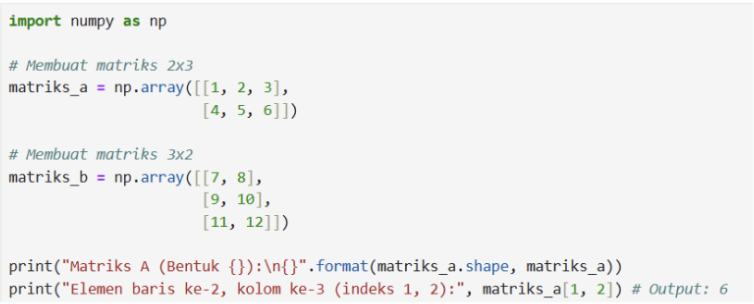

5.2. Operasi Matriks Dasar

NumPy memungkinkan operasi matriks dasar yang intuitif:
1. Penjumlahan dan Pengurangan Matriks
Operasi ini dilakukan secara element-wise (elemen per elemen) dan hanya bisa dilakukan jika kedua matriks memiliki dimensi yang sama.

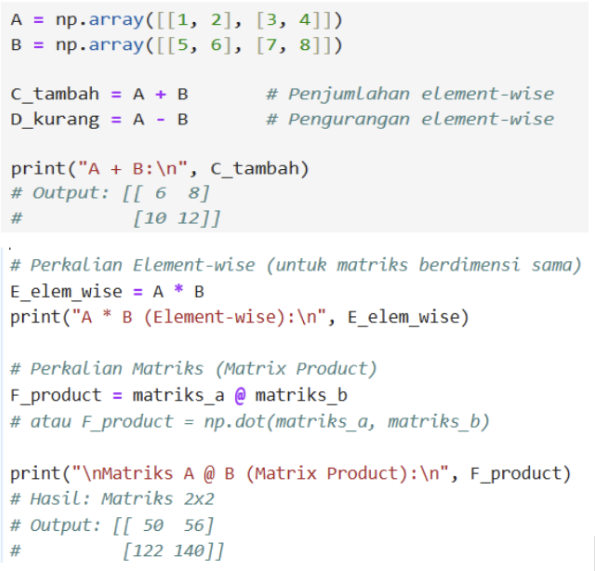

Untuk menukar baris dan kolom, gunakan atribut .T (singkatan dari Transpose).


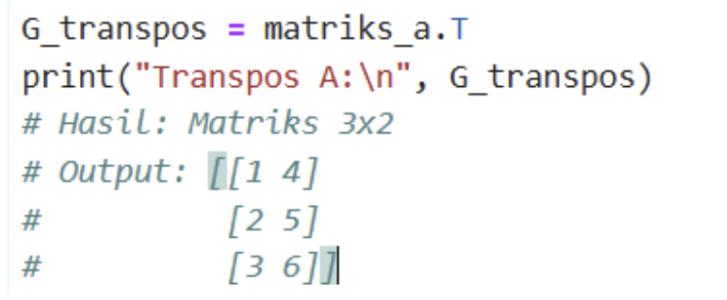

### 6. Membuat array multidimensi 

Membuat array multidimensi di Python paling efektif dilakukan menggunakan pustaka NumPy. Objek utamanya, ndarray (array N-dimensi), memberikan kecepatan dan efisiensi memori yang jauh lebih baik untuk komputasi ilmiah dibandingkan list bersarang Python biasa.

6.1. Menggunakan NumPy (Pilihan Terbaik) 

Anda harus mengimpor NumPy dan menggunakan fungsi np.array() dengan nested list (list bersarang) sebagai input.

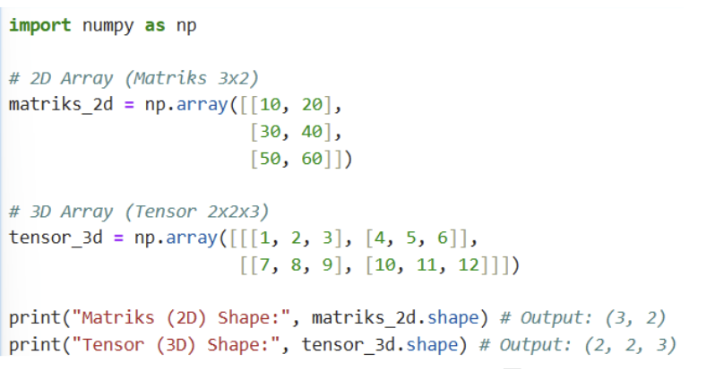

6.2. Mengakses dan Memotong Array (Slicing)

Pengaksesan elemen dan sub-array (slicing) pada ndarray sangat fleksibel dan penting untuk manipulasi data.


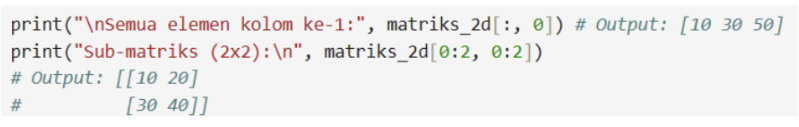

6.3. Menggunakan List Bersarang Python (Cara Dasar)

Untuk matriks sederhana atau ketika Anda tidak membutuhkan operasi numerik canggih, Anda dapat menggunakan list bersarang.


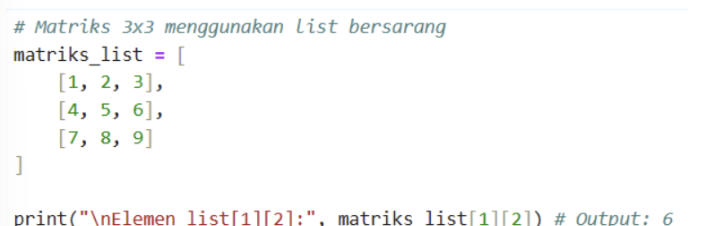

### 7. Mengetahui index elemen pada array

Cara mengetahui indeks (posisi) suatu elemen dalam array di Python bergantung pada struktur data yang Anda gunakan: List Python biasa atau NumPy ndarray.

7.1. List Python Biasa (Metode .index()) 

Metode .index() adalah bawaan dari tipe data list Python dan digunakan untuk mencari indeks elemen.
- Fitur Utama: Hanya mengembalikan indeks kemunculan pertama dari elemen yang dicari.
- Perhatian: Akan menimbulkan error (ValueError) jika elemen tidak ditemukan.

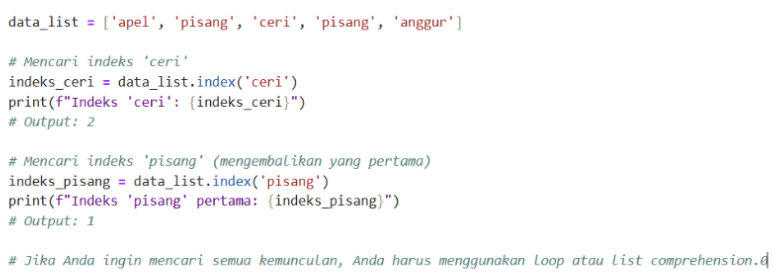

7.2. NumPy ndarray (Fungsi np.where()) 

NumPy adalah standar untuk array multidimensi. Fungsi np.where() adalah metode yang paling kuat karena dapat mencari di semua dimensi dan mengembalikan semua indeks kemunculan.
- Array 1 Dimensi (1D)
Fungsi ini mengambil kondisi logis (array == nilai) dan mengembalikan tuple yang berisi array indeks.

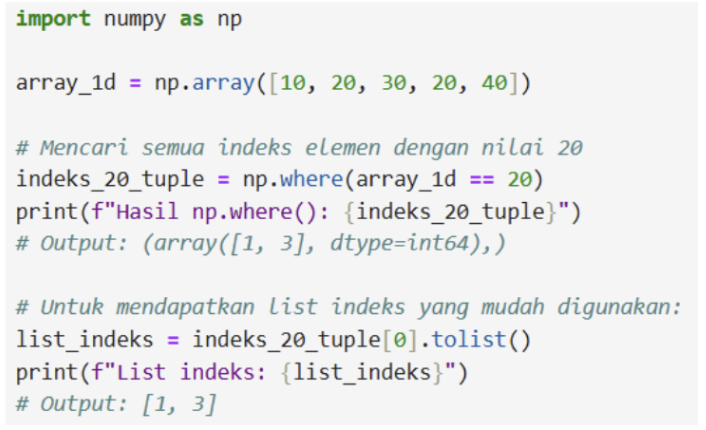

- Array 2 Dimensi (2D / Matriks)

Pada 2D atau dimensi yang lebih tinggi, np.where() mengembalikan satu array indeks untuk setiap sumbu (baris, kolom, lapisan).

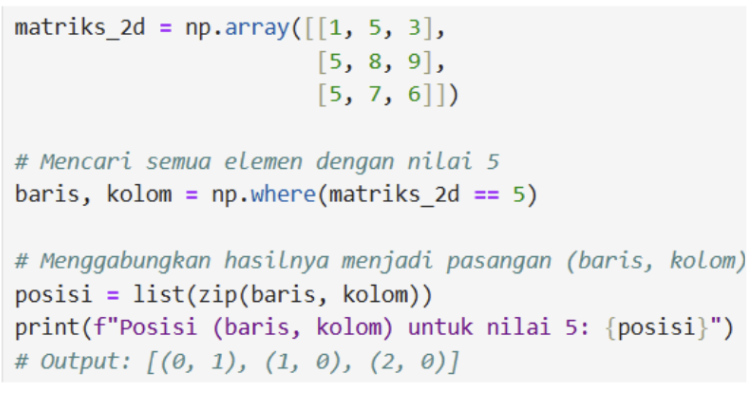

### 8. Mengimplementasikan operasi logika matematika menggunakan Boolean

Dalam buku tersebut, operasi logika matematika dengan Boolean dijelaskan sebagai cara penting untuk melakukan perhitungan kondisional pada array NumPy. Ketika elemen-elemen array dibandingkan menggunakan operator logika seperti >, <, >=, <=, ==, atau !=, hasilnya adalah array baru dengan nilai True atau False untuk setiap elemen. Array Boolean ini dapat digunakan untuk memfilter data, melakukan komputasi vektorisasi, atau menggantikan pernyataan if tradisional. Misalnya, perbandingan a < b antara dua array menghasilkan array [True, True, False, False], yang menunjukkan elemen mana dari a yang lebih kecil dari b. Nilai-nilai Boolean ini juga dapat digabungkan dengan fungsi seperti np.all() (memeriksa apakah semua elemen bernilai True) atau np.any() (memeriksa apakah ada satu saja yang True). 

Keunggulan utama dari array Boolean adalah kemampuannya untuk digunakan dalam ekspresi aritmetika, di mana True diperlakukan sebagai 1 dan False sebagai 0. Hal ini memungkinkan pembuatan fungsi bersyarat secara ringkas. Sebagai contoh, jika x = np.array([-2, -1, 0, 1, 2]), maka x > 0 menghasilkan [False, False, False, True, True]. Apabila dikalikan dengan x, hasilnya [0, 0, 0, 1, 2], artinya hanya elemen positif dari x yang dipertahankan.

Contoh Kode : 


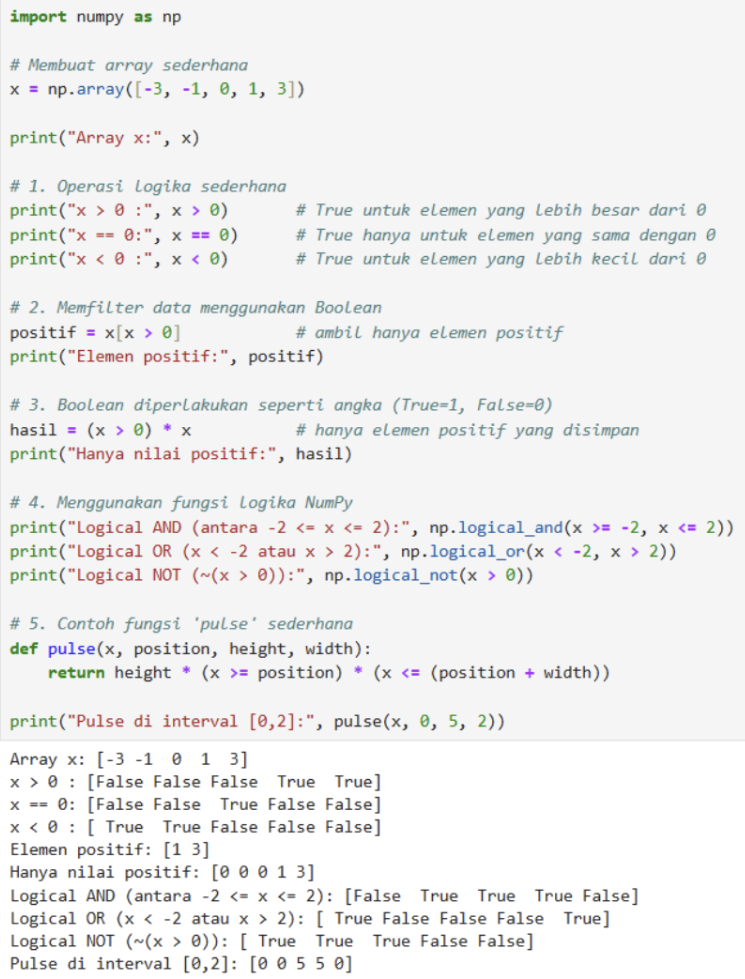

### 9. Melakukan operasi aritmatika


Operasi aritmatika dengan array NumPy dilakukan secara element-wise, artinya setiap elemen pada array dihitung dengan elemen yang berada pada posisi yang sama dari array lain. Konsep ini membuat perhitungan menjadi jauh lebih sederhana dibandingkan penggunaan perulangan manual dalam Python. Operasi aritmatika dasar seperti penjumlahan (+), pengurangan (-), perkalian (*), pembagian (/), hingga perpangkatan (**) dapat langsung diterapkan pada array, dan hasilnya juga berupa array baru dengan ukuran yang sama. Jika salah satu operand berupa skalar (bilangan tunggal), maka operasi dilakukan terhadap semua elemen array sekaligus, sehingga tidak perlu menggunakan loop.

Sebagai contoh, misalkan kita memiliki dua array a = np.array([1, 2, 3]) dan b = np.array([4, 5, 6]). Jika dilakukan operasi a + b, hasilnya adalah [5, 7, 9], di mana penjumlahan dilakukan per elemen: 1+4, 2+5, 3+6. Begitu juga dengan operasi lain seperti a * b menghasilkan [4, 10, 18]. Selain itu, operasi dengan skalar, misalnya a * 2, akan mengalikan setiap elemen array dengan 2 sehingga hasilnya [2, 4, 6]. Keunggulan metode ini adalah kode menjadi ringkas, mudah dibaca, dan sangat efisien karena dihitung langsung oleh NumPy tanpa iterasi eksplisit.

Contoh Kode :


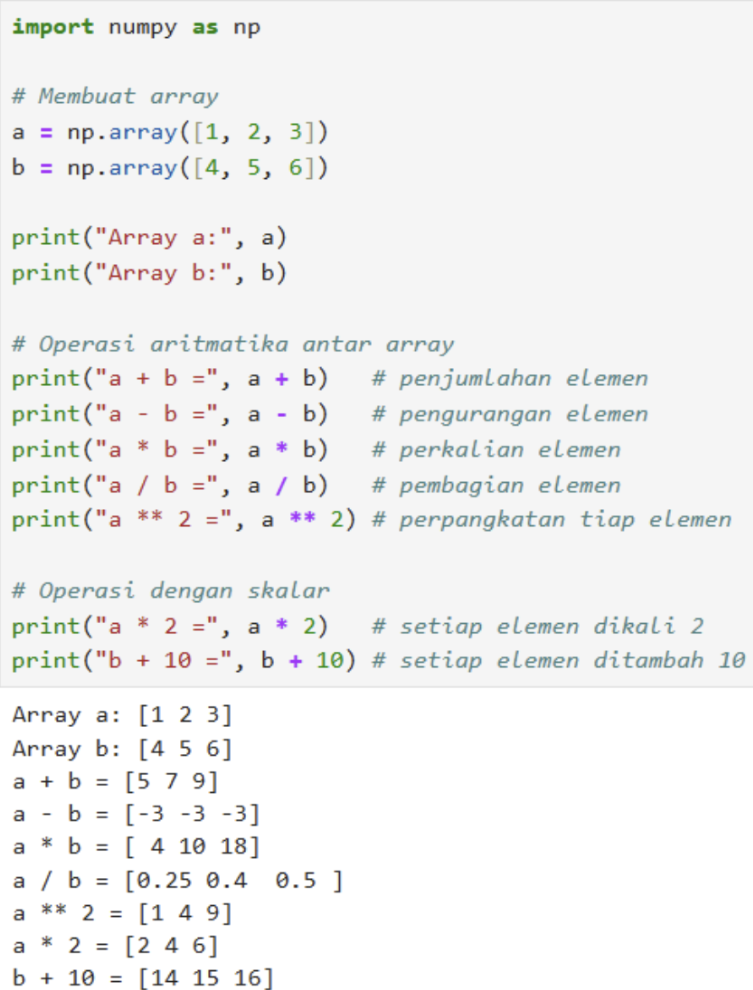

### 10. Elementwise function

Elementwise function adalah fungsi yang bekerja pada setiap elemen array secara independen dan menghasilkan array baru dengan ukuran yang sama. Fungsi ini memungkinkan penerapan operasi matematis yang lebih kompleks, seperti fungsi trigonometri (sin, cos, tan), fungsi eksponensial (exp), logaritma (log), akar kuadrat (sqrt), hingga fungsi manipulasi nilai seperti abs (nilai mutlak). Keunggulan utama dari elementwise function adalah efisiensinya: kita tidak perlu melakukan perulangan manual untuk menghitung hasil dari setiap elemen, karena NumPy secara otomatis menerapkannya ke seluruh array sekaligus. Selain membuat kode lebih ringkas, metode ini juga jauh lebih cepat karena dioptimalkan di tingkat rendah.

Sebagai contoh, jika kita memiliki array x = np.array([0, 1, 2, 3]), maka np.sqrt(x) akan menghasilkan [0., 1., 1.41421356, 1.73205081], yaitu akar kuadrat dari setiap elemen x. Demikian pula, np.exp(x) menghitung nilai eksponensial e^x untuk tiap elemen, sedangkan np.sin(x) menghitung nilai sinus setiap elemen dalam radian. Semua perhitungan ini dilakukan secara serentak tanpa perlu iterasi eksplisit.

Contoh Kode : 


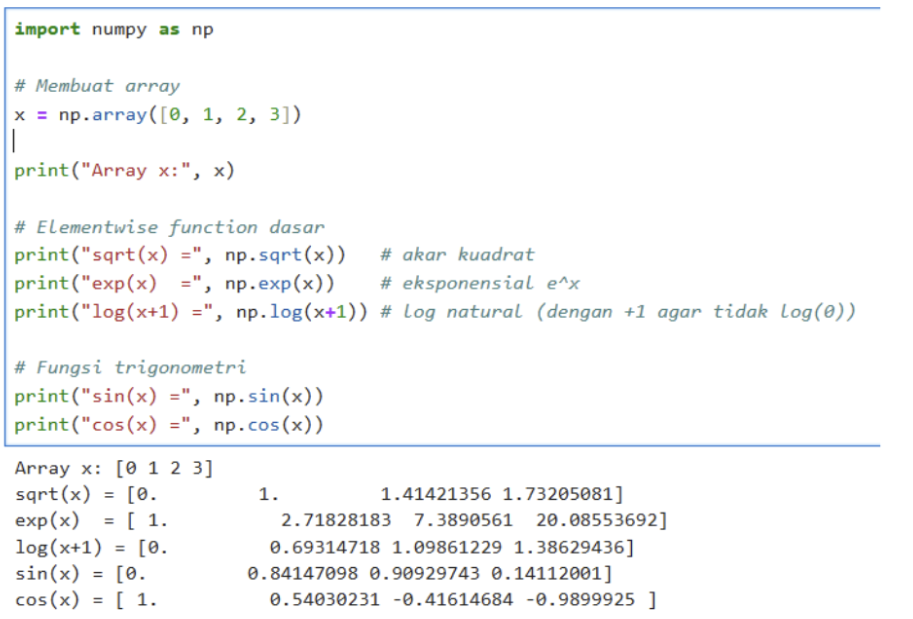

### 11. Melakukan agregasi beberapa array


Agregasi adalah proses meringkas kumpulan data menjadi nilai yang lebih sederhana dan mudah dipahami. Misalnya, dari sebuah tabel berisi ratusan angka, kita mungkin hanya ingin tahu berapa jumlah total, nilai rata-rata, atau angka terbesar. Dengan NumPy, proses ini bisa dilakukan dengan cepat menggunakan fungsi agregasi.

Beberapa fungsi agregasi yang umum digunakan adalah:
- np.sum(arr) → menjumlahkan semua elemen array.
- np.min(arr) dan np.max(arr) → mencari nilai terkecil dan terbesar.
- np.mean(arr) → menghitung rata-rata.
- np.median(arr) → menghitung nilai tengah.
- np.var(arr) dan np.std(arr) → menghitung varian dan standar deviasi.

Selain untuk keseluruhan array, kita juga bisa melakukan agregasi berdasarkan dimensi tertentu dengan menggunakan parameter axis:
- axis=0 berarti menghitung agregasi per kolom.
- axis=1 berarti menghitung agregasi per baris.

Contoh kode:


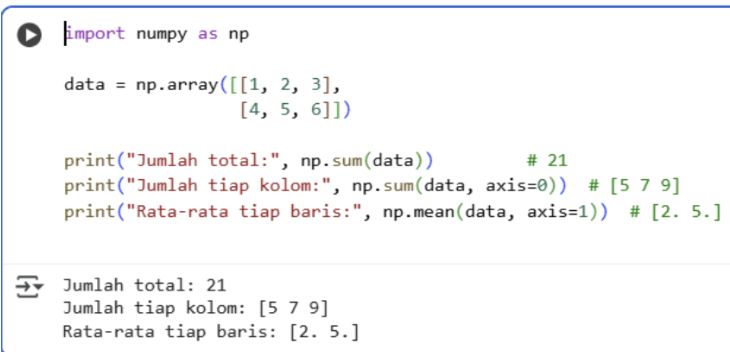

Dari kode di atas, terlihat bahwa NumPy mampu meringkas data dengan sangat cepat. Kita bisa langsung mengetahui jumlah keseluruhan angka, jumlah per kolom, maupun rata-rata per baris hanya dengan satu baris kode.

### 12. Melakukan operasi dengan logika himpunan


Konsep pertama yang penting adalah boolean array, yaitu array yang isinya True atau False hasil dari operasi perbandingan. Ketika kita menuliskan ekspresi seperti x > 0, maka setiap elemen dalam array x akan dibandingkan dengan 0 dan hasilnya berupa array baru berisi True jika memenuhi syarat atau False jika tidak. Array jenis ini bisa kita gunakan untuk menyaring data sehingga hanya elemen yang sesuai kondisi saja yang ditampilkan. Misalnya kita punya array x berisi angka negatif hingga positif, lalu kita ingin menampilkan hanya bilangan positif.

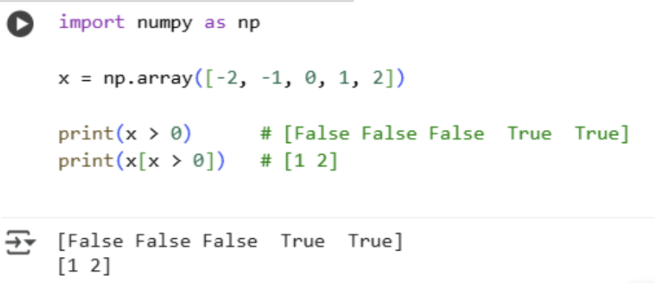

Hasil di atas menunjukkan bagaimana boolean array bisa dipakai sebagai filter sederhana. Selain itu, NumPy juga menyediakan berbagai fungsi operasi himpunan yang memungkinkan kita memperlakukan array layaknya himpunan dalam matematika. Kita bisa mencari gabungan dengan np.union1d(), irisan dengan np.intersect1d(), atau selisih dengan np.setdiff1d(). Ada juga np.unique() untuk mengambil elemen unik dari sebuah array serta np.isin() untuk mengecek apakah elemen tertentu ada dalam array lain. 

Contoh penggunaannya adalah sebagai berikut:

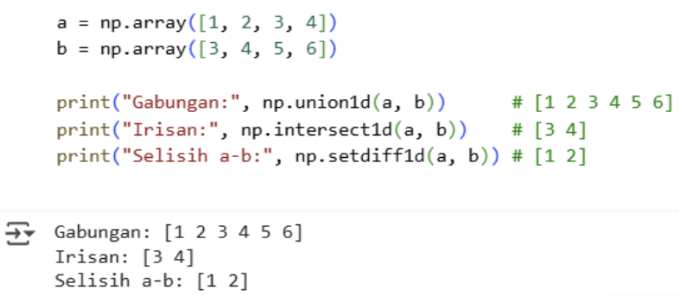

Dengan cara ini, kita bisa dengan mudah mengetahui elemen yang sama di dua array, elemen yang berbeda, atau menggabungkan keduanya tanpa perlu menulis perulangan manual.

### 13. Memanipulasi array 


Bagian terakhir adalah manipulasi array, yaitu proses mengubah bentuk, ukuran, atau susunan array agar sesuai dengan kebutuhan analisis. Misalnya, sering kali data yang kita punya berbentuk satu dimensi, padahal kita ingin melihatnya dalam bentuk tabel dua dimensi. NumPy menyediakan fungsi reshape untuk mengubah dimensi array tanpa mengubah datanya. Jika kita ingin menukar baris dan kolom dalam sebuah matriks, kita bisa menggunakan transpose. Untuk menggabungkan beberapa array, kita bisa memakai concatenate, sementara untuk memecah array besar menjadi bagian-bagian lebih kecil bisa memakai split. Tidak hanya itu, tersedia juga fungsi insert, append, dan delete untuk menambah atau menghapus elemen. Berikut contoh sederhananya:

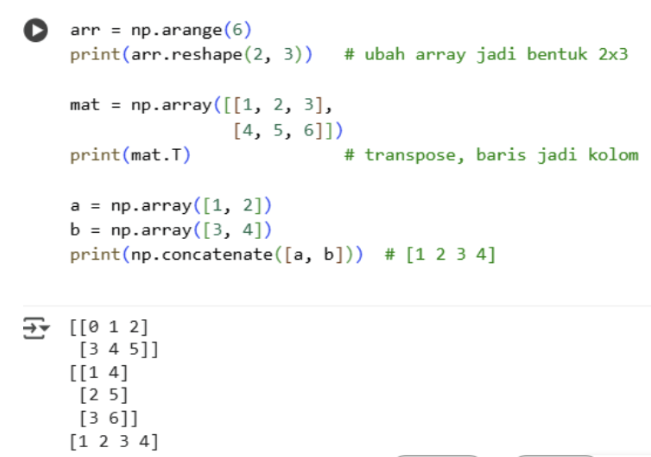

Dari kode di atas terlihat bagaimana kita bisa dengan mudah mengubah bentuk array, menukar susunannya, maupun menggabungkan beberapa array menjadi satu.

Kesimpulannya : Bab 2 menegaskan bahwa tiga kemampuan utama dalam penggunaan NumPy adalah agregasi, operasi logika himpunan, dan manipulasi array. Agregasi membantu meringkas data menjadi informasi sederhana seperti jumlah, rata-rata, atau nilai maksimum. Operasi logika dan himpunan memungkinkan kita untuk menyaring data dengan kondisi tertentu atau membandingkan isi antar array. Sedangkan manipulasi array memberi fleksibilitas untuk mengatur ulang bentuk dan susunan data sehingga lebih sesuai dengan analisis yang kita butuhkan. Dengan menguasai ketiga hal ini, kita bisa bekerja dengan data numerik secara lebih cepat, efisien, dan mudah dipahami.
